Flavia's fast food chain Data Analysis.
My task is to detrmine the best promotion that can increase sales with an introduction of a new item.

Checking up the data!
The first step in this is figuring out what we need to clean.

In [3]:
import pandas as pd
import seaborn as sns

In [4]:
marketing_data= pd.read_csv(r'C:\Users\flavi\OneDrive\Desktop\data for practice\Marketing.csv')
marketing_data

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81
...,...,...,...,...,...,...,...
543,10,Large,919,2,1,4,64.34
544,10,Large,920,14,2,1,50.20
545,10,Large,920,14,2,2,45.75
546,10,Large,920,14,2,3,44.29


In [5]:
marketing_data.isna().sum()

MarketID            0
MarketSize          0
LocationID          0
AgeOfStore          0
Promotion           0
week                0
SalesInThousands    0
dtype: int64

In [6]:
marketing_data.Promotion.unique()

array([3, 2, 1], dtype=int64)

In [7]:
marketing_data.MarketID.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [8]:
marketing_data.MarketSize.unique()

array(['Medium', 'Small', 'Large'], dtype=object)

First, I'm going to look at the differences in sales based on weekly bases.

Perform one-way ANOVA where your categorical variable is Week and continous variable is SalesInThousands

In [9]:
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import MultiComparison 
from statsmodels.stats.anova import anova_lm 

In [10]:
marketing_data['Week'] = marketing_data['week'].astype('category')

In [11]:
formula = 'SalesInThousands ~ C(week)'
model = ols(formula, marketing_data).fit()
aov_table = anova_lm(model)
print(aov_table)

             df         sum_sq     mean_sq        F    PR(>F)
C(week)     3.0      24.072749    8.024250  0.02843  0.993534
Residual  544.0  153539.206956  282.241189      NaN       NaN


There is a significant difference in sales based on week since p value is less than 0.5

I did a tukeyhsd test to further verify the significance

In [12]:
mc = MultiComparison(marketing_data['SalesInThousands'], marketing_data['week'])
result = mc.tukeyhsd()

print(result)
print(mc.groupsunique)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   -0.404 0.9972 -5.6349 4.8269  False
     1      3   -0.316 0.9987 -5.5469 4.9149  False
     1      4  -0.5775  0.992 -5.8084 4.6534  False
     2      3    0.088    1.0 -5.1429 5.3189  False
     2      4  -0.1735 0.9998 -5.4044 5.0574  False
     3      4  -0.2615 0.9992 -5.4924 4.9694  False
---------------------------------------------------
[1 2 3 4]


Task 2:Checking for Linearity
Before you execute a linear regression model, it is advisable to validate that certain assumptions are met.
you may want to check that a linear relationship exists between the dependent variable and the independent variable/s.

Performing the Multiple Linear Regression

In [13]:
from sklearn import linear_model
from statsmodels.formula.api import ols

Running a multilinear regression.

In [14]:
fit = ols('SalesInThousands ~ AgeOfStore + C(MarketSize) + Promotion', data=marketing_data).fit() 

fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       SalesInThousands   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     135.0
Date:                Wed, 24 Aug 2022   Prob (F-statistic):           5.22e-80
Time:                        16:28:57   Log-Likelihood:                -2132.5
No. Observations:                 548   AIC:                             4275.
Df Residuals:                     543   BIC:                             4297.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  70.1805      1.611     43.562      0.000      67.016      73.345
C(MarketSize)[T.Medium]   -26.2576      1.143    -22.965      0.000     -28.503     -24.012
C(MarketSize)[T.Small]    -13.0421      1.814     -7.189      0.000     -16.606      -9.479
AgeOfStore                  0.1045      0.078      1.342      0.180      -0.048       0.257
Promotion                  -0.4150      0.630     -0.659      0.510      -1.653       0.823
==============================================================================
Omnibus:                        6.836   Durbin-Watson:                   0.515
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                5.661
Skew:                          -0.164   Prob(JB):                       0.0590
Kurtosis:                       2.626   Cond. No.                         43.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Task 3:A

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy import stats

To determine which promotion type was the most successful , I carried out descriptive Analysis.

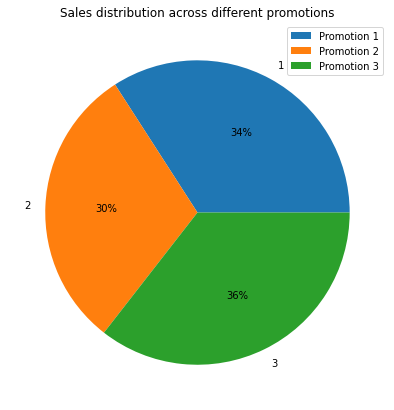

In [16]:
#by sells
dta = marketing_data.groupby(
    'Promotion'
).sum()[
    'SalesInThousands'
].plot.pie(
    figsize=(7, 7),
    autopct='%1.0f%%'
)


prom = ['Promotion 1', 'Promotion 2', 'Promotion 3']


dta.set_ylabel('')
dta.set_title('Sales distribution across different promotions')
plt.legend(prom, loc="upper right")

plt.show()

By sales the most successful was promotion 3, followed by promotion 1, then  promotion 2.

In [17]:
#By market size
marketing_data.groupby('MarketSize').count()['MarketID']

MarketSize
Large     168
Medium    320
Small      60
Name: MarketID, dtype: int64

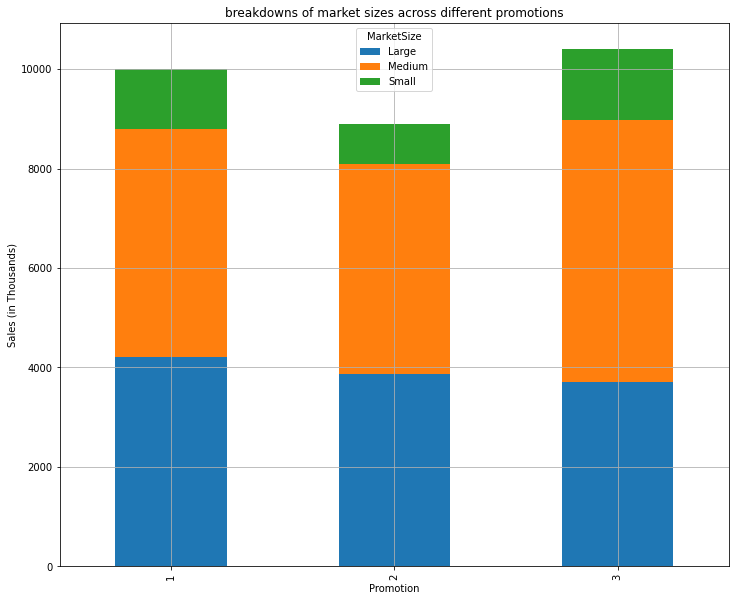

In [18]:
dta =marketing_data.groupby([
    'Promotion', 'MarketSize'
]).sum()[
    'SalesInThousands'
].unstack(
    'MarketSize'
).plot(
    kind='bar',
    figsize=(12,10),
    grid=True,
    stacked=True
)

dta.set_ylabel('Sales (in Thousands)')
dta.set_title('breakdowns of market sizes across different promotions')

plt.show()

By market size the most successful was promotion 3,followed by promotion 1, then promotion 2.

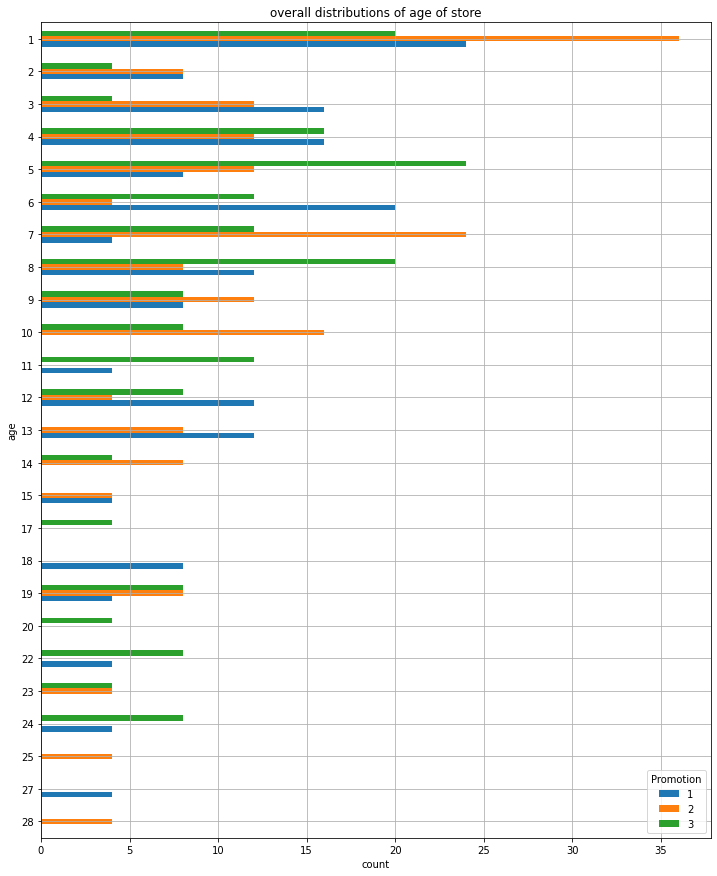

In [19]:
#by age of store
dta = marketing_data.groupby(
    ['AgeOfStore', 'Promotion']
).count()[
    'MarketID'
].unstack(
    'Promotion'
).iloc[::-1].plot(
    kind='barh', 
    figsize=(12,15),
    grid=True
)

dta.set_ylabel('age')
dta.set_xlabel('count')
dta.set_title('overall distributions of age of store')

plt.show()

In [20]:
marketing_data.groupby('Promotion').describe()['AgeOfStore']

,count,mean,std,min,25%,50%,75%,max
Promotion,,,,,,,,
1,172.0,8.279070,6.636160,1.0,3.0,6.0,12.0,27.0
2,188.0,7.978723,6.597648,1.0,3.0,7.0,10.0,28.0
3,188.0,9.234043,6.651646,1.0,5.0,8.0,12.0,24.0


Seems like promotion 3 was the most successfully when considering age of store determined by the mean,followed by promotion 1, then promotion 2

In [21]:
from statsmodels.stats.power import  tt_ind_solve_power
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

def test_ttest_power_diff(mean=9.234043, std=6.651646, sample1_size=None, alpha=0.1, desired_power=0.8, mean_diff_percentages=[0.1, 0.05]):
    '''
    calculates the power function for a given mean and std. the function plots a graph showing the comparison between desired mean differences
    :param mean: the desired mean
    :param std: the std value
    :param sample1_size: if None, it is assumed that both samples (first and second) will have same size. The function then will
    walk through possible sample sizes (up to 100, hardcoded).
    If this value is not None, the function will check different alternatives for sample 2 sizes up to sample 1 size.
    :param alpha: alpha default value is 0.05
    :param desired_power: will use this value in order to mark on the graph
    :param mean_diff_percentages: iterable list of percentages. A line per value will be calculated and plotted.
    :return: None
    '''
    fig, ax = plt.subplots()
    for mean_diff_percent in mean_diff_percentages:
        mean_diff = mean_diff_percent * mean
        effect_size = mean_diff / std

        print('Mean diff: ', mean_diff)
        print('Effect size: ', effect_size)

        powers = []

        max_size  = sample1_size
        if sample1_size is None:
            max_size = 100

        sizes = np.arange(1, max_size, 2)
        for sample2_size in sizes:
            if(sample1_size is None):
                n = tt_ind_solve_power(effect_size=effect_size, nobs1=sample2_size, alpha=alpha, ratio=1.0, alternative='two-sided')
                print('tt_ind_solve_power(alpha=', alpha, 'sample2_size=', sample2_size, '): sample size in *second* group: {:.5f}'.format(n))
            else:
                n = tt_ind_solve_power(effect_size=effect_size, nobs1=sample1_size, alpha=alpha, ratio=(1.0*sample2_size/sample1_size), alternative='two-sided')
                print('tt_ind_solve_power(alpha=', alpha, 'sample2_size=', sample2_size, '): sample size *each* group: {:.5f}'.format(n))

            powers.append(n)

        try: # mark the desired power on the graph
            z1 = interp1d(powers, sizes)
            results = z1(desired_power)

            plt.plot([results], [desired_power], 'gD')
        except Exception as e:
            print("Error: ", e)
            #ignore

        plt.title('Power vs. Sample Size')
        plt.xlabel('Sample Size')
        plt.ylabel('Power')

        plt.plot(sizes, powers, label='diff={:2.0f}%'.format(100*mean_diff_percent)) #, '-gD')

    plt.legend()
    plt.show()

The next step I carried out significant tests to investigate which promotion type was the most successful.I used T-test which looks to see if mean values of two groups differ signicantly.

In [22]:
means = marketing_data.groupby('Promotion').mean()['SalesInThousands']
means

Promotion
1    58.099012
2    47.329415
3    55.364468
Name: SalesInThousands, dtype: float64

Promotion 1 vs. 2

In [23]:
t, p = stats.ttest_ind(
    marketing_data.loc[marketing_data['Promotion'] == 1, 'SalesInThousands'].values, 
    marketing_data.loc[marketing_data['Promotion'] == 2, 'SalesInThousands'].values, 
    equal_var=False
)
print("t-Value: " + str('{:.7f}'.format(t)))
print("p-Value: " + str('{:.7f}'.format(p)))

t-Value: 6.4275287
p-Value: 0.0000000


Promotion 1 vs. 3

In [24]:
t, p = stats.ttest_ind(
    marketing_data.loc[marketing_data['Promotion'] == 1, 'SalesInThousands'].values, 
    marketing_data.loc[marketing_data['Promotion'] == 3, 'SalesInThousands'].values, 
    equal_var=False
)
print("t-Value: " + str('{:.7f}'.format(t)))
print("p-Value: " + str('{:.7f}'.format(p)))


t-Value: 1.5560224
p-Value: 0.1205915


Promotion 2 vs. 3

In [25]:
t, p = stats.ttest_ind(
    marketing_data.loc[marketing_data['Promotion'] == 2, 'SalesInThousands'].values, 
    marketing_data.loc[marketing_data['Promotion'] == 3, 'SalesInThousands'].values, 
    equal_var=False
)
print("t-Value: " + str('{:.7f}'.format(t)))
print("p-Value: " + str('{:.7f}'.format(p)))

t-Value: -4.8813927
p-Value: 0.0000016
